<a href="https://colab.research.google.com/github/ruhan-dave/gradio_wonders_dpl/blob/main/wonders_notebook_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai2
!pip install nbdev
import fastai2
from fastai2.vision import *
from nbdev.showdoc import *

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
!ls

     |████████████████████████████████| 720 kB 3.9 MB/s 
     |████████████████████████████████| 1.2 MB 64.1 MB/s 
     |████████████████████████████████| 189 kB 67.0 MB/s 
Mounted at /content/gdrive
gdrive	sample_data


In [ ]:
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [ ]:
classes = ["Chichen Itza", "Christ The Redeemer", "Colosseum", "Machu Picchu", "Petra",  "Taj Mahal", "The Great Wall of China"]

In [ ]:
# just for fun, checking out the colab GPU
"""
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

["Angkor Wat", "Burj Khalifa dubai", "Chichen Itza", "Christ The Redeemer", "Chrysler Building", "CN Tower", "Colosseum", "Disneyland Castle",
           "Dome of the Rock", "Eiffel Tower", "Great Mosque of Djenné", "Golen Gate Bridge", "Guggenheim Museum", "House of Parliament and Elizabeth Tower",
           "Le Mont-Saint-Michel", "Leaning Tower of Pisa", "Louvre", "Machu Picchu", "Parthenon", "Petra", "Potala Palace", "Sagrada Família", 
           "Space Needle", "St. Basil’s Cathedral", "Sultan Ahmed Mosque", "Sydney Opera House", "Taipei 101", "Taj Mahal", "Temple of Heaven", 
           "The Flatiron Building", "The Forbidden City", "The Gateway Arch", "The Great Wall of China", "The Lotus Temple", "The Sphinx"]
  
"""

'\ngpu_info = !nvidia-smi\ngpu_info = \'\n\'.join(gpu_info)\nif gpu_info.find(\'failed\') >= 0:\n  print(\'Not connected to a GPU\')\nelse:\n  print(gpu_info)\n\n["Angkor Wat", "Burj Khalifa dubai", "Chichen Itza", "Christ The Redeemer", "Chrysler Building", "CN Tower", "Colosseum", "Disneyland Castle",\n           "Dome of the Rock", "Eiffel Tower", "Great Mosque of Djenné", "Golen Gate Bridge", "Guggenheim Museum", "House of Parliament and Elizabeth Tower",\n           "Le Mont-Saint-Michel", "Leaning Tower of Pisa", "Louvre", "Machu Picchu", "Parthenon", "Petra", "Potala Palace", "Sagrada Família", \n           "Space Needle", "St. Basil’s Cathedral", "Sultan Ahmed Mosque", "Sydney Opera House", "Taipei 101", "Taj Mahal", "Temple of Heaven", \n           "The Flatiron Building", "The Forbidden City", "The Gateway Arch", "The Great Wall of China", "The Lotus Temple", "The Sphinx"]\n  \n'

In [ ]:
from google.colab import drive

In [ ]:
path = 'gdrive/MyDrive/AI_projects/wonders'
p_path = Path(path)
fns = get_image_files(path)
fns

(#1038) [Path('gdrive/MyDrive/AI_projects/wonders/Chichen Itza/El Castillo_ Chichen Itza - Wikipedia.jpg'),Path('gdrive/MyDrive/AI_projects/wonders/Chichen Itza/Chichen Itza _ Description_ Buildings....jpg'),Path('gdrive/MyDrive/AI_projects/wonders/Chichen Itza/Chichen Itza.jpg'),Path('gdrive/MyDrive/AI_projects/wonders/Chichen Itza/Pyramid of Kukulcan at Chich_en Itza....jpg'),Path('gdrive/MyDrive/AI_projects/wonders/Chichen Itza/Chichen Itza_ Maya Temples in the....jpg'),Path('gdrive/MyDrive/AI_projects/wonders/Chichen Itza/Chichen Itza_ Mexico. Temple of ....jpg'),Path('gdrive/MyDrive/AI_projects/wonders/Chichen Itza/Wall Panels at Chichen Itza_ Mexico....jpg'),Path('gdrive/MyDrive/AI_projects/wonders/Chichen Itza/Chichen Itza - Wikipedia.jpg'),Path('gdrive/MyDrive/AI_projects/wonders/Chichen Itza/Mayan Temple.jpg'),Path('gdrive/MyDrive/AI_projects/wonders/Chichen Itza/The Temple of Kukuklan at Chichen Itza.jpe')...]

In [ ]:
path

'gdrive/MyDrive/AI_projects/wonders'

In [ ]:
"""
failed = verify_images(fns)
failed.map(Path.unlink);
"""

'\nfailed = verify_images(fns)\nfailed.map(Path.unlink);\n'

In [ ]:
Path.BASE_PATH = path
p_path.ls()

(#11) [Path('Chichen Itza'),Path('Christ The Redeemer'),Path('Colosseum'),Path('Machu Picchu'),Path('Petra'),Path('Taj Mahal '),Path('The Great Wall of China'),Path('export.h5'),Path('export.pkl'),Path('wonder_app_model.pkl')...]

In [ ]:
# This is just for testing out and understanding regular expressions
"""
import re
string = "wang/ruhan-2001@gmail.com"
re.findall(r"[a-z]+/[a-z]+-[0-9]+@", string) # returns ['wang/ruhan-2001@']
re.findall(r"[0-9]+@[a-z]+.com", string) # returns ['2001@gmail.com']
re.findall(r"\d+@[a-z]+", string) # returns ['2001@gmail']

fname = 'images/Bengal_82.jpg'
re.findall(r'/(.+)_\d+.jpg$', fname) # if you specify (sth) inside r"...", then only the re instructions inside () will be returned.

link = "images/mechanic/00000052.jpg"
re.findall(r"[a-z]+/[0-9]+.jpg$", link) # returns ['mechanic/00000052.jpg']
re.findall(r"/([a-z]+)/[0-9]+.jpg$", link) # returns ['mechanic']
"""

'\nimport re\nstring = "wang/ruhan-2001@gmail.com"\nre.findall(r"[a-z]+/[a-z]+-[0-9]+@", string) # returns [\'wang/ruhan-2001@\']\nre.findall(r"[0-9]+@[a-z]+.com", string) # returns [\'2001@gmail.com\']\nre.findall(r"\\d+@[a-z]+", string) # returns [\'2001@gmail\']\n\nfname = \'images/Bengal_82.jpg\'\nre.findall(r\'/(.+)_\\d+.jpg$\', fname) # if you specify (sth) inside r"...", then only the re instructions inside () will be returned.\n\nlink = "images/mechanic/00000052.jpg"\nre.findall(r"[a-z]+/[0-9]+.jpg$", link) # returns [\'mechanic/00000052.jpg\']\nre.findall(r"/([a-z]+)/[0-9]+.jpg$", link) # returns [\'mechanic\']\n'

In [ ]:
# continue here

In [ ]:
world_wonders = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2, seed=42),
                 get_y=parent_label,
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=225, mult=1.0, do_flip=True, flip_vert=False, max_rotate=15.0, min_zoom=0.9, max_zoom=1.1, 
                                           max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75, xtra_tfms=None, mode='bilinear', pad_mode='reflection', 
                                           align_corners=True, batch=False, min_scale=0.75))


In [ ]:
# We need our images to have the same dimensions, so that they can collate into tensors to be passed to the GPU. 
# We also want to minimize the number of distinct augmentation computations we perform. The performance requirement suggests that we should, 
# where possible, compose our augmentation transforms into fewer transforms (to reduce the number of computations and the number of lossy operations) 
# and transform the images into uniform sizes (for more efficient processing on the GPU).

# To work around the challenge of resizing images to larger pixels but with lower resolution, spurious empty zones, and degraded information, 
#presizing adopts two strategies that are shown:

# Resize images to relatively "large" dimensions—that is, dimensions significantly larger than the target training dimensions.
# Compose all of the common augmentation operations (including a resize to the final target size) into one, and perform the combined operation 
#on the GPU only once at the end of processing, rather than performing the operations individually and interpolating multiple times.

In [ ]:
# Crop full width or height: This is in item_tfms, so it's applied to each individual image before it is copied to the GPU. 
# It's used to ensure all images are the same size. On the training set, the crop area is chosen randomly. 
# On the validation set, the center square of the image is always chosen.

# Random crop and augment: This is in batch_tfms, so it's applied to a batch all at once on the GPU, which means it's fast. 
# On the validation set, only the resize to the final size needed for the model is done here. 
# On the training set, the random crop and any other augmentations are done first.

In [ ]:
dls = world_wonders.dataloaders(path)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


In [ ]:
# dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
# world_wonders.summary(path)

In [ ]:
#   We will compare a few of the small models (resnet 34 and resnet 50, before experimenting with the resnet 101 and 152 to save time 
#   and we compare these 2 models to see how well they fit the images because having more layers does not necessarily mean lower error rates.

In [ ]:
#learn = cnn_learner(dls, resnet34, metrics=error_rate)
#learn.fine_tune(2)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.070396,0.348851,0.115942,00:28


epoch,train_loss,valid_loss,error_rate,time
0,0.398491,0.173172,0.057971,00:27
1,0.280489,0.121669,0.033816,00:26
2,0.199878,0.104818,0.028986,00:26
3,0.153804,0.099991,0.028986,00:27


In [ ]:
# The table shown when we fit a model shows us the results after each epoch of training. 
# Remember, an epoch is one complete pass through all of the images in the data. 
# The columns shown are the average loss over the items of the training set, the loss on the validation set, 
#and any metrics that we requested—in this case, the error rate.

In [ ]:
#cleaner = ImageClassifierCleaner(cnn50)
#cleaner
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

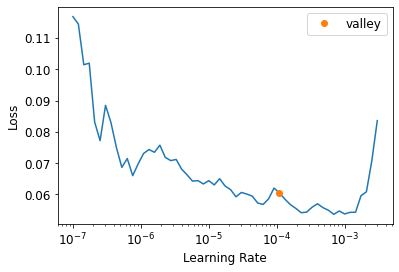

In [ ]:
steep = learn.lr_find()

In [ ]:
steep

SuggestedLRs(valley=2.0892961401841603e-05)

In [ ]:
learn.fit_one_cycle(2, 2e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.077389,0.117926,0.033816,00:27
1,0.057273,0.119878,0.038647,00:27


In [ ]:
# Yay! This definitely helped the model improve. It looks like we should pick learning rate of "base_lr=5e-3". 
# Now we will do transfer learning.

SuggestedLRs(valley=9.120108734350652e-05)

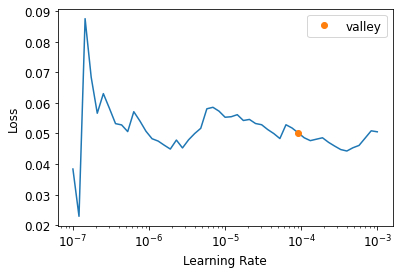

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
learner = cnn_learner(dls, resnet34, metrics=error_rate)
learner.fit_one_cycle(3, 1e-4)
learner.unfreeze()
learner.fit_one_cycle(6, cbs=EarlyStoppingCallback(monitor='error_rate', patience=2), lr_max=slice(1e-6, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,3.126967,2.036892,0.758454,00:26
1,2.754182,1.343765,0.454106,00:25
2,2.513635,1.235851,0.415459,00:26


epoch,train_loss,valid_loss,error_rate,time
0,1.687347,0.479160,0.164251,00:27
1,1.014336,0.198395,0.072464,00:26
2,0.679658,0.173094,0.048309,00:27
3,0.493621,0.152019,0.043478,00:26
4,0.382753,0.143686,0.043478,00:28
5,0.302560,0.145540,0.038647,00:28


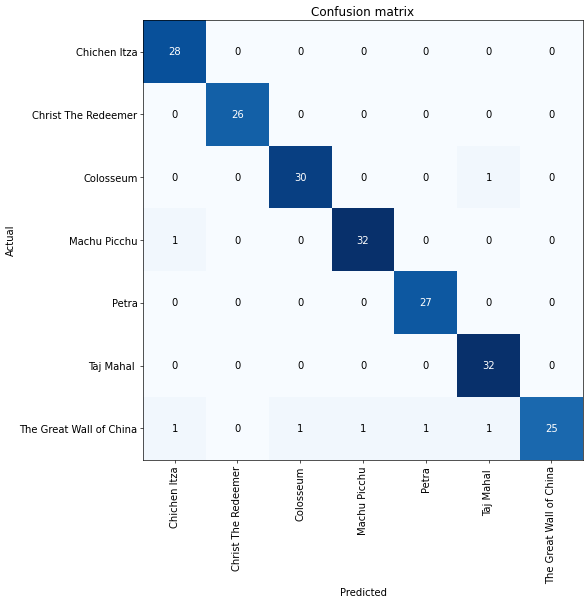

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10, 10), dpi=60)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.917192,0.295005,0.077295,01:09


epoch,train_loss,valid_loss,error_rate,time
0,0.422063,0.192856,0.057971,00:26
1,0.313997,0.128004,0.033816,00:25
2,0.224213,0.144181,0.033816,00:25
3,0.162188,0.157734,0.033816,00:27
4,0.126330,0.138555,0.038647,00:26
5,0.101720,0.140555,0.033816,00:26


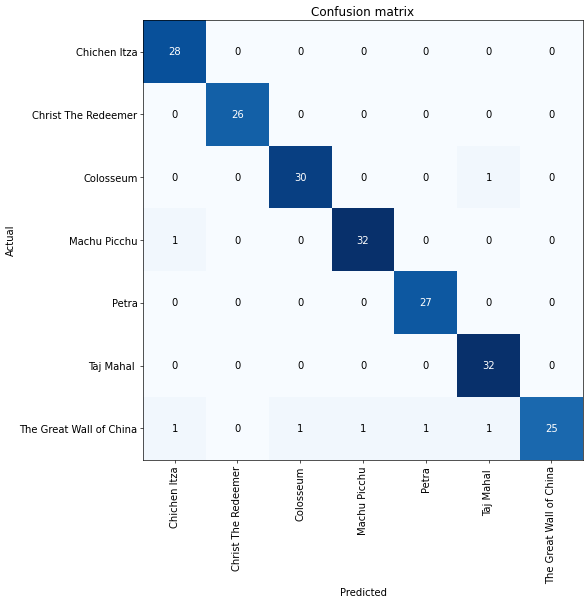

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10, 10), dpi=60)

In [ ]:
# I'm gonna settle with the model with 3% error rate.

In [ ]:
learn.path = Path("gdrive/MyDrive/AI_projects/wonders") # have to include the / to specify where to save it to.

In [ ]:
learn.export("wonder_app_model.pkl")
#path = Path("gdrive/MyDrwonder_appive/AI_projects/wonders")
#path.ls(file_exts='.pkl')

In [ ]:
import os
filename = f"{path}/wonder_app_model.pkl"
os.makedirs(os.path.dirname(filename), exist_ok=True)

learn = load_learner(fname=filename)
learn.dls.vocab

['Chichen Itza', 'Christ The Redeemer', 'Colosseum', 'Machu Picchu', 'Petra', 'Taj Mahal ', 'The Great Wall of China']

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr


def predict_image(img):
    prediction = learn.predict(PILImage.create(img))
    classes = learn.dls.vocab
    probs_list = prediction[2].numpy()
    return {c: f"{round(float(probs_list[i]), 4)}" for (i, c) in enumerate(classes)}
        

image = gr.inputs.Image(shape=(225,225))
label = gr.outputs.Label(num_top_classes=7)

interface = gr.Interface(
    fn=predict_image,
    inputs=image,
    outputs=label
)

interface.launch(debug=True, enable_queue=True)
#         'category': classes[prediction[1].item()],

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://41555.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<fastapi.applications.FastAPI at 0x7f30be36fa90>,
 'http://127.0.0.1:7860/',
 'https://41555.gradio.app')

In [ ]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

In [ ]:
upload.data

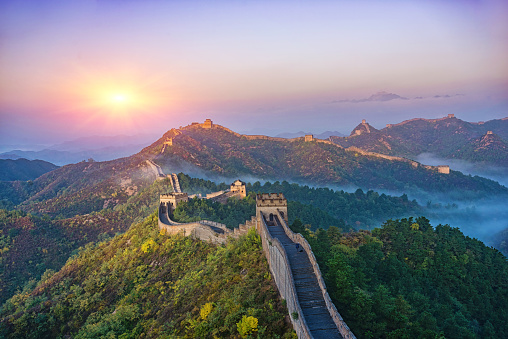

In [ ]:
from fastai.vision.core import *


img = PILImage.create(upload.data[-1])
img

In [ ]:
out = widgets.Output()
out.clear_output()
with out: display(img.to_thumb(200, 200))
out

Output()

In [ ]:
run = widgets.Button(description="Go!")
run

Button(description='Go!', style=ButtonStyle())

In [ ]:
def classify(change):
  img = PILImage.create(upload.data[-1])
  out.clear_output()
  with out: display(img.to_thumb(200, 200))
  pred, idx, probs = learn.predict(img)
  val = f"Looks most like: {pred} with probability: {round(float(probs[idx]), 2)}"

In [ ]:
run.on_click(classify)

In [ ]:
pred, idx, probs = learn.predict(img)
predict = widgets.Label()
predict.value = f"Looks most like: {pred}. Probability: {100*round(float(probs[idx]), 4)}%"
predict

Label(value='Looks most like: The Great Wall of China. Probability: 99.39%')

In [ ]:
#{c: f"{round(100*float(probs[i]), 4)}%" for (i, c) in enumerate(classes)}


In [ ]:
VBox([widgets.Label('Select your wonder!'), 
      upload, run, out, predict])

In [ ]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

In [ ]:
file = f"/Users/owner/Desktop/wonder_app/wonder_app_model.pkl"
test = load_learner(fname=file)
